## Bayesian optimization visualization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

c:\Users\gard_\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


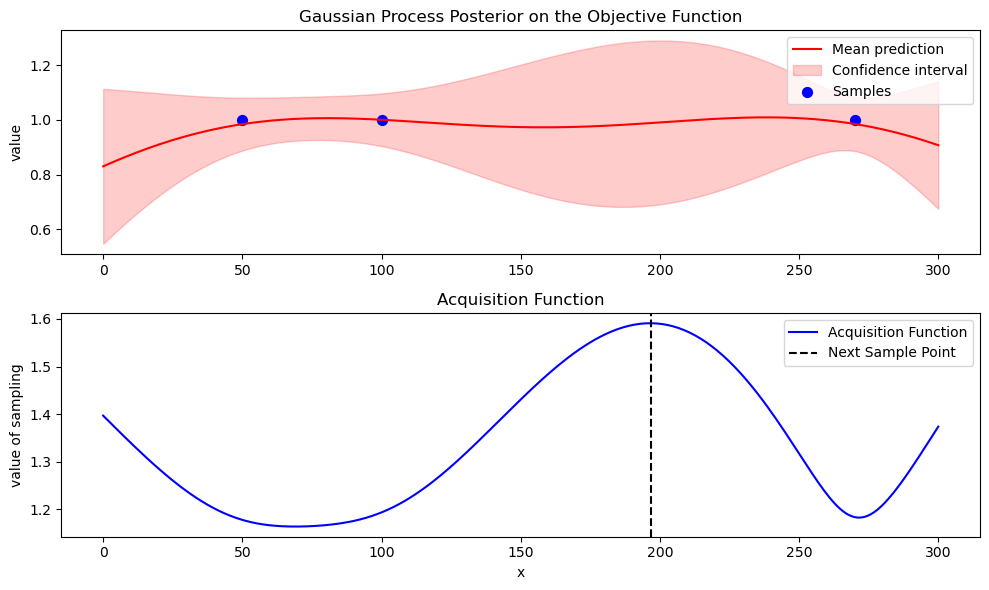

In [19]:
# Objective function to minimize
def objective_function(x):
    return np.sin(x / 50) + np.cos(x / 30)

def objective_function(x):
    return x/x

# Generate initial data points
X = np.array([50, 100, 270]).reshape(-1, 1)
y = objective_function(X)

# Create a dense set of x values for predictions
X_pred = np.linspace(0, 300, 300).reshape(-1, 1)

# Fit a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(50, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)
gp.fit(X, y)

# Predict the mean and standard deviation
y_pred, sigma = gp.predict(X_pred, return_std=True)

# Acquisition function (e.g., Upper Confidence Bound - UCB)
kappa = 2.0  # Exploration-exploitation tradeoff
acquisition = y_pred + kappa * sigma

# Plot GP posterior
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(X_pred, y_pred, 'r-', label='Mean prediction')
plt.fill_between(X_pred.flatten(), y_pred - sigma, y_pred + sigma, color='r', alpha=0.2, label='Confidence interval')
plt.scatter(X, y, c='b', s=50, label='Samples')
plt.title('Gaussian Process Posterior on the Objective Function')
plt.legend()
plt.ylabel('value')

# Plot acquisition function
plt.subplot(2, 1, 2)
plt.plot(X_pred, acquisition, 'b-', label='Acquisition Function')
plt.axvline(X_pred[np.argmax(acquisition)], color='k', linestyle='--', label='Next Sample Point')
plt.title('Acquisition Function')
plt.legend()
plt.xlabel('x')
plt.ylabel('value of sampling')

plt.savefig("C:/Users/gard_/Documents/MasterThesis/ProjectThesis/MyPipeline/Figures/BayesOpt.pdf")
plt.tight_layout()
plt.show()